In [3]:
import numpy as np
from numpy import pi as pi
import matplotlib.pyplot as plt
%matplotlib inline

state 0
state 1
state 1
state 0
state 1
start_angle -0.465
origin [-24   0]
start_point [  0.13318227 -12.10741564]
end_angle 0.465
origin [-24   0]
end_point [ 0.13318227 12.10741564]

start_angle 0.465
origin [-24   0]
start_point [ 0.13318227 12.10741564]
origin changed to [24.26636454 24.21483128]
end_angle 2.676592653589793
origin [24.26636454 24.21483128]
end_point [ 0.13318227 36.32224692]

start_angle 2.676592653589793
origin [24.26636454 24.21483128]
start_point [ 0.13318227 36.32224692]
origin changed to [-24.          48.42966256]
end_angle 0.46499999999999864
origin [-24.          48.42966256]
end_point [ 0.13318227 60.5370782 ]

start_angle 0.46499999999999864
origin [-24.          48.42966256]
start_point [ 0.13318227 60.5370782 ]
end_angle 1.394999999999999
origin [-24.          48.42966256]
end_point [-19.27790935  75.01352721]

start_angle 1.394999999999999
origin [-24.          48.42966256]
start_point [-19.27790935  75.01352721]
origin changed to [-14.55581869 101.59

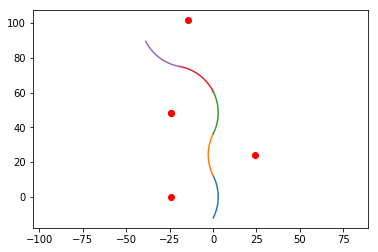

In [69]:
# bi-state 0 = bend to left --> draw link by moving through NEGATIVE angular displacement in regular cartesion FOR
# bi_state 1 = bend to right --> draw link by moving through POSITIVE angular displacement in regular cartesian FOR
# COA = central point of actuator 

def angle_to_Xdatum(point, o, r):
    x = 0
    y = 1
    origin = o
    radius = r
    acute_angle = np.arcsin(abs( origin[y] - point[y] ) / radius)
    quadrant = np.empty((2))
    quadrant[x] = 1 if (point[x] > origin[x]) else 0
    quadrant[y] = 1 if (point[y] > origin[y]) else 0

    if np.allclose(quadrant,  np.array([1, 1])):   angle = acute_angle
    elif np.allclose(quadrant,  np.array([0, 1])): angle = pi - acute_angle
    elif np.allclose(quadrant,  np.array([0, 0])): angle = pi + acute_angle
    else:                                          angle = 2 * pi - acute_angle
        
    return angle

    
    
def actuator_top(n, radius = 27, bi_states = [1, 0, 1, 1, 0 ,0 ,0], arc_angle = 0.93, COA = [0, 0]): 
    "2D plot of series linked, bistable actuators"
    
    numsegments = 1000
    x = 0
    y = 1
    
    # the actuator centre is atthe midpoint of the chord of the first (vertically alligned) link
    state = bi_states[n-1]
    print("state", state)

    
    if n == 1:        
        # define the angle of start of arc relative to horizontal datum
        if state:
            start_angle = (0 - (arc_angle / 2)) 
        else:
            start_angle = (pi + (arc_angle / 2))  
        
        # define the origin of the arc
        sagitta = radius * (1 - np.cos(arc_angle / 2))
        origin = np.array(COA)
        origin[x] += (radius - sagitta) * (-1 if state else 1) 
        
        print("start_angle", start_angle)
        print("origin", origin)
        
        
    
    else:            
        # define the angle of start of arc relative to horizontal datum
        start_angle, origin, start_point = actuator_top(n-1)
        print("start_angle", start_angle)
        print("origin", origin)
        print("start_point", start_point)
        
        # if the bistable state is not same as previous link ... 
        if bi_states[n-1]!=bi_states[n-2]:
            # mirror origin of the arc in tangent to start point
            origin = start_point + np.array([radius * np.cos(start_angle),                                             
                                             radius * np.sin(start_angle)])
            print("origin changed to", origin)
            
            # redefine start angle (between start_point-origin and 1st quadrant horizontal datum)
            #             acute_angle = np.arcsin(abs( origin[y] - start_point[y] ) / radius)
            #             quadrant = np.empty((2))
            #             quadrant[x] = 1 if (start_point[x] > origin[x]) else 0
            #             quadrant[y] = 1 if (start_point[y] > origin[y]) else 0

            #             if np.allclose(quadrant,  np.array([1, 1])):   start_angle = acute_angle
            #             elif np.allclose(quadrant,  np.array([0, 1])): start_angle = pi - acute_angle
            #             elif np.allclose(quadrant,  np.array([0, 0])): start_angle = pi + acute_angle
            #             else:                                          start_angle = 2 * pi - acute_angle
            start_angle = angle_to_Xdatum(start_point, origin, radius)
    
    arc_points = np.linspace(start_angle, 
                             start_angle + (arc_angle * (1 if state else -1)), 
                             numsegments)    

    arc = np.array([origin[x] + radius * np.cos(arc_points), 
                    origin[y] + radius * np.sin(arc_points)])
   
    plt.plot(arc[x], arc[y])

    # end angle (between end_point-origin and 1st quadrant horizontal datum)
    if n == 1:
        start_point = arc[:, 0]
        print("start_point", start_point)
    plt.plot(origin[x], origin[y], 'ro')
    
    end_point = arc[:, -1]   
    #     acute_angle = np.arcsin(abs( origin[y] - end_point[y] ) / radius)
    #     quadrant = np.empty((2))
    #     quadrant[x] = 1 if (end_point[x] > origin[x]) else 0
    #     quadrant[y] = 1 if (end_point[y] > origin[y]) else 0

    #     if np.allclose(quadrant,  np.array([1, 1])):   end_angle = acute_angle
    #     elif np.allclose(quadrant,  np.array([0, 1])): end_angle = pi - acute_angle
    #     elif np.allclose(quadrant,  np.array([0, 0])): end_angle = pi + acute_angle
    #     else: 
    end_angle = angle_to_Xdatum(end_point, origin, radius)
    
    print("end_angle", end_angle)
    print("origin", origin)
    print("end_point", end_point)
    print()
        
    return end_angle, origin, end_point         
    
F = actuator_top(5)
plt.xlim(0, 40)
plt.ylim(0, 40)
plt.axis('equal')        
print(F)    
        
        
        
        
        
        
        
        
        